In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("../dataset/이자보상배율최종.csv", encoding='cp949')
backtest_2011=pd.read_csv("../년도별 주식데이터/2011년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2012=pd.read_csv("../년도별 주식데이터/2012년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2013=pd.read_csv("../년도별 주식데이터/2013년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2014=pd.read_csv("../년도별 주식데이터/2014년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2015=pd.read_csv("../년도별 주식데이터/2015년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2016=pd.read_csv("../년도별 주식데이터/2016년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2017=pd.read_csv("../년도별 주식데이터/2017년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2018=pd.read_csv("../년도별 주식데이터/2018년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2019=pd.read_csv("../년도별 주식데이터/2019년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2020=pd.read_csv("../년도별 주식데이터/2020년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_kosdak=pd.read_csv("../년도별 주식데이터/코스닥주가.csv", encoding='cp949') 

In [4]:
for i in data.index:
    data.loc[i,"회계년도"]=data.loc[i,"회계년도"].replace('-12-', '-04-')
    data.loc[i,"상장일"]=data.loc[i,"상장일"].replace('-',"")
 
data.rename(columns={'회계년도':'투자일자'},inplace=True)
data

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.530000,2011,12,0
1,(주)CMG제약,58820,2012-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.750000,2012,12,0
2,(주)CMG제약,58820,2013-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.700000,2013,12,0
3,(주)CMG제약,58820,2014-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.600000,2014,12,0
4,(주)CMG제약,58820,2015-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.220000,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,흥구석유(주),24060,2016-04-01,19941207,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.660000,2016,12,0
10648,흥구석유(주),24060,2017-04-01,19941207,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.910000,2017,12,0
10649,흥구석유(주),24060,2018-04-01,19941207,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.660000,2018,12,0
10650,흥구석유(주),24060,2019-04-01,19941207,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.020000,2019,12,0


In [5]:
#logit 피처선정별 종류의 피처
data_mda = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]1주당순이익', '[제조]총자본투자효율','[제조]부가가치', '[제조]매출액순이익률', 
                 '[제조]자기자본배율', '[제조]총자본증가율','[제조]유형자산증가율',"[제조]유동비율",'[제조]비유동자산회전률','[제조]매입채무회전률' ]]
data_logit=data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]총자본증가율', '[제조]총자본사업이익률', '[제조]1주당매출액', 
                '[제조]비유동자산회전률', '[제조]매출채권회전률', '[제조]순운전자본회전률', '[제조]현금비율', '[제조]자기자본배율', '[제조]노동소득분배율','[제조]이자보상배율(이자비용)']]
data_lasso = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율','[제조]매출액순이익률',
                '[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_elastic = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율',
                     '[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_same = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]노동소득분배율','[제조]자기자본배율','[제조]현금비율','[제조]자기자본증가율',
                  '[제조]총자본증가율','[제조]재고자산증가율','[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]순운전자본회전률']]

In [6]:
# 투자 조건에 맞는 기업들을 오름차순 정렬
data_logit =data_logit.sort_values("[제조]총자본증가율", ascending=False)
data_logit 

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
5434,(주)젠큐릭스,229000,2020-04-01,20200625,NaN,"의료, 정밀, 광학기기 및 시계 제조업",5,2579.67,-14.44,245.67,0.03,4.00,0.08,65.64,1668.31,10.94,-40.20
449,(주)녹원씨엔아이,65560,2017-04-01,20030701,NaN,도매 및 상품 중개업,6,922.64,13.16,1366.56,0.78,3.89,0.33,12.36,919.88,43.03,2.53
5969,(주)케이프,64820,2016-04-01,20070529,NaN,기타 운송장비 제조업,5,845.91,0.82,6593.90,1.05,32.54,1.13,23.74,1354.08,49.41,1.30
3679,(주)에이프로젠헬스케어앤게임즈,109960,2017-04-01,20091113,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,807.95,-1.19,228.02,0.34,4.00,0.18,69.62,455.87,655.85,-1.04
9098,에이비엘바이오(주),298380,2018-04-01,20181219,NaN,의료용 물질 및 의약품 제조업,5,729.02,-14.14,3788.48,0.16,0.24,0.01,1053.27,704.07,0.00,-35.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,(주)엔에스엔,31860,2013-04-01,19970107,NaN,도매 및 상품 중개업,5,-81.91,-2.13,428.44,0.09,0.34,0.06,16.78,73.27,0.00,-3.95
886,(주)드림티엔터테인먼트,220110,2018-04-01,20150624,2020-04-10,"기타 전문, 과학 및 기술 서비스업",4,-85.30,6.79,2214.30,5.32,9.80,0.82,8.84,31.18,0.00,26.99
4042,(주)영진코퍼레이션,53330,2014-04-01,20011101,2015-04-23,기타 기계 및 장비 제조업,4,-87.70,-5.96,349.71,0.59,0.87,0.15,0.25,-61.44,0.00,-1.68
8830,아이스테이션(주),56010,2011-04-01,20020813,2012-04-13,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",4,-94.94,-114.71,1092.16,3.01,11.74,0.40,0.09,0.00,0.00,-14.13


In [7]:
# 년도별로 분류
data_logit_2011 = data_logit[data_logit["투자일자"]=='2011-04-01']
data_logit_2012 = data_logit[data_logit["투자일자"]=='2012-04-01']
data_logit_2012["투자일자"] = "2012-04-02"
data_logit_2013 = data_logit[data_logit["투자일자"]=='2013-04-01']
data_logit_2014 = data_logit[data_logit["투자일자"]=='2014-04-01']
data_logit_2015 = data_logit[data_logit["투자일자"]=='2015-04-01']
data_logit_2016 = data_logit[data_logit["투자일자"]=='2016-04-01']
data_logit_2017 = data_logit[data_logit["투자일자"]=='2017-04-01']
data_logit_2017["투자일자"] = "2017-04-03"
data_logit_2018 = data_logit[data_logit["투자일자"]=='2018-04-01']
data_logit_2018["투자일자"] = "2018-04-02"
data_logit_2019 = data_logit[data_logit["투자일자"]=='2019-04-01']
data_logit_2020 = data_logit[data_logit["투자일자"]=='2020-04-01']


c:\Users\김성휘\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\김성휘\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\Users\김성휘\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying 

In [8]:
data_logit_2011_buy=data_logit_2011[data_logit_2011["상장일"]<='20110401']
data_logit_2012_buy=data_logit_2012[data_logit_2012["상장일"]<='20120401']
data_logit_2013_buy=data_logit_2013[data_logit_2013["상장일"]<='20130401']
data_logit_2014_buy=data_logit_2014[data_logit_2014["상장일"]<='20140401']
data_logit_2015_buy=data_logit_2015[data_logit_2015["상장일"]<='20150401']
data_logit_2016_buy=data_logit_2016[data_logit_2016["상장일"]<='20160401']
data_logit_2017_buy=data_logit_2017[data_logit_2017["상장일"]<='20170401']
data_logit_2018_buy=data_logit_2018[data_logit_2018["상장일"]<='20180401']
data_logit_2019_buy=data_logit_2019[data_logit_2019["상장일"]<='20190401']
data_logit_2020_buy=data_logit_2020[data_logit_2020["상장일"]<='20200401']


In [9]:
# 해당기업 순위 20위 추출
data_logit_2011_buy=data_logit_2011_buy[:20]
data_logit_2012_buy=data_logit_2012_buy[:20]
data_logit_2013_buy=data_logit_2013_buy[:20]
data_logit_2014_buy=data_logit_2014_buy[:20]
data_logit_2015_buy=data_logit_2015_buy[:20]
data_logit_2016_buy=data_logit_2016_buy[:20]
data_logit_2017_buy=data_logit_2017_buy[:20]
data_logit_2018_buy=data_logit_2018_buy[:20]
data_logit_2019_buy=data_logit_2019_buy[:20]
data_logit_2020_buy=data_logit_2020_buy[:20]

In [10]:
#트레이드 조건 주기
data_logit_2011_buy["trade"]="buy"
data_logit_2012_buy["trade"]="buy"
data_logit_2013_buy["trade"]="buy"
data_logit_2014_buy["trade"]="buy"
data_logit_2015_buy["trade"]="buy"
data_logit_2016_buy["trade"]="buy"
data_logit_2017_buy["trade"]="buy"
data_logit_2018_buy["trade"]="buy"
data_logit_2019_buy["trade"]="buy"
data_logit_2020_buy["trade"]="buy"

In [11]:
stock_2011 = pd.merge(backtest_2011,data_logit_2011_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2012 = pd.merge(backtest_2012,data_logit_2012_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2013 = pd.merge(backtest_2013,data_logit_2013_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2014 = pd.merge(backtest_2014,data_logit_2014_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2015 = pd.merge(backtest_2015,data_logit_2015_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2016 = pd.merge(backtest_2016,data_logit_2016_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2017 = pd.merge(backtest_2017,data_logit_2017_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2018 = pd.merge(backtest_2018,data_logit_2018_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2019 = pd.merge(backtest_2019,data_logit_2019_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2020 = pd.merge(backtest_2020,data_logit_2020_buy, how='left',on=['회사명','투자일자','거래소코드'])

In [12]:
stock_2020[stock_2020["trade"]=="buy"]["회사명"].unique()
# stock_2020[stock_2020["trade"]=="buy"]

array(['(주)노바텍', '(주)뉴파워프라즈마', '(주)드림시큐리티', '(주)디아크', '(주)메디프론디비티',
       '(주)멕아이씨에스', '(주)바이오니아', '(주)씨젠', '(주)엑세스바이오인코퍼레이션', '(주)지어소프트',
       '(주)케일럼', '(주)코원플레이', '에이치엘비제약(주)', '전진바이오팜(주)', '케이지이티에스(주)',
       '코나아이(주)', '피씨엘(주)', '피에스케이홀딩스(주)', '해성산업(주)', '휴림로봇(주)'],
      dtype=object)

In [13]:
list =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]
list_grn =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]


In [14]:
for i in range(len(list)):
    for j in list[i].index:
        if j>0:
            if list[i].loc[j-1,"trade"] == "buy":
                list[i].loc[j,"trade"] = "hold"
            elif  list[i].loc[j-1,"trade"] == "hold":
                if list[i].iloc[:,1][j] == list[i].iloc[:,1][j-1]:
                    list[i].loc[j,"trade"] = "hold"
                elif list[i].iloc[:,1][j] != list[i].iloc[:,1][j-1]:
                    list[i].loc[j-1,"trade"] = "sell"
                if j== list[i].tail(n=1).index:
                    list[i].loc[j,"trade"] = "sell"
                        
for i in range(len(list)):
    list[i] = list[i][["회사명","거래소코드","투자일자","종가","일일수익률","trade"]]
    list[i] = list[i].dropna()
    list[i] = list[i].sort_values('투자일자', ascending=True)
    list[i] = list[i].reset_index(drop='index')
    list[i] = list[i].groupby("투자일자")["일일수익률"].sum()/20

In [15]:
# acc_rtn2= 1
# for i in range(len(list)):
#     list[i]=list[i].reset_index()
#     for j in list[i].index:
        
#         list[i].loc[j,"연누적수익률"] = acc_rtn2*list[i].loc[j,"일일수익률"]
#         acc_rtn2 = list[i].loc[j,"연누적수익률"]

In [16]:
# list[1]

In [17]:
#각 년도별 수익률 합치기
rtn =pd.concat(list)
rtn = pd.DataFrame(rtn)

In [18]:
#리밸런싱 날짜는 수익률 반영을 못하므로 제거
rtn["일일수익률"] =rtn["일일수익률"]*100
rtn =rtn.drop(index=["2011-04-01","2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
stock_rtn=rtn.reset_index()

In [19]:
stock_rtn=rtn.reset_index()
stock_rtn.columns=["투자일자","일일수익률(%)"]
stock_rtn["일일수익률"] =(stock_rtn["일일수익률(%)"]/100) +1
stock_rtn

,투자일자,일일수익률(%),일일수익률
0,2011-04-04,2.414332,1.024143
1,2011-04-05,-0.139991,0.998600
2,2011-04-06,0.550310,1.005503
3,2011-04-07,-0.097386,0.999026
4,2011-04-08,-0.731004,0.992690
...,...,...,...
2448,2021-03-25,0.274422,1.002744
2449,2021-03-26,2.761120,1.027611
2450,2021-03-29,-0.589312,0.994107
2451,2021-03-30,0.851308,1.008513


In [20]:
# stock_rtn[stock_rtn["투자일자"]=='2012-03-30']248
# stock_rtn[stock_rtn["투자일자"]=='2013-03-29'] 494
# stock_rtn[stock_rtn["투자일자"]=='2014-03-31'] 740
# stock_rtn[stock_rtn["투자일자"]=='2015-03-31'] 983
# stock_rtn[stock_rtn["투자일자"]=='2016-03-31'] 1230
# stock_rtn[stock_rtn["투자일자"]=='2017-03-31'] 1477
# stock_rtn[stock_rtn["투자일자"]=='2018-03-30'] 1718
# stock_rtn[stock_rtn["투자일자"]=='2019-03-29'] 1959
# stock_rtn[stock_rtn["투자일자"]=='2020-03-31'] 2207
# stock_rtn[stock_rtn["투자일자"]=='2021-03-31'] 2452


In [21]:
acc_rtn=1
for i in stock_rtn.index:
    
    stock_rtn.loc[i,"누적수익률"] = acc_rtn*stock_rtn.loc[i,"일일수익률"]
    acc_rtn = stock_rtn.loc[i,"누적수익률"]
        

acc_rtn_1 = 1
for i in stock_rtn.index:
    if i <= 248:
        
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_1*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_1 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 1
        
acc_rtn_2 = 1
for i in stock_rtn.index:
    if 248 < i <= 494:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_2*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_2 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 2
        
acc_rtn_3 = 1        
for i in stock_rtn.index:
    if  494< i <=740:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_3*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_3 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 3
        
acc_rtn_4 = 1       
for i in stock_rtn.index:
    if 740 < i <= 983:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_4*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_4 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 4
        
acc_rtn_5 = 1       
for i in stock_rtn.index:
    if  983< i <= 1230:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_5*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_5 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 5

acc_rtn_6 = 1
for i in stock_rtn.index:
    if 1230 < i <= 1477:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_6*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_6 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 6
        
acc_rtn_7 = 1
for i in stock_rtn.index:
    if 1477 < i <= 1718:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_7*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_7 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 7

acc_rtn_8 = 1
for i in stock_rtn.index:
    if 1718 < i <= 1959:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_8*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_8 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 8   
             
acc_rtn_9 = 1      
for i in stock_rtn.index:
    if 1959 < i <= 2207:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_9*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_9 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 9
        
acc_rtn_10 = 1       
for i in stock_rtn.index:
    if 2207 < i <= 2452:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_10*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_10 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 10
    

In [22]:
#코스닥 시작 데이터 61
# backtest_kosdak[backtest_kosdak["날짜"]=="2011-04-04"]
#코스닥 마지막 데이터 2522
#backtest_kosdak[backtest_kosdak["날짜"]=="2021-03-31"]

In [23]:
#코스닥 데이터 끌고오기
backtest_kosdak_buy= backtest_kosdak[61:2523]
backtest_kosdak_rtn = backtest_kosdak_buy.set_index("날짜")

In [24]:
backtest_kosdak_rtn =backtest_kosdak_rtn.drop(index=["2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
backtest_kosdak_rtn=backtest_kosdak_rtn.reset_index()

In [25]:
backtest_kosdak_rtn.columns = ["투자일자","코스닥종가","시가총액","코스닥수익률","코스닥시총수익률"]

In [26]:
#주식수익률과 코스닥 merge
stock_rtn_all = pd.merge(stock_rtn,backtest_kosdak_rtn,how="left",on="투자일자")


In [27]:
stock_rtn_all["코스닥수익률"]=stock_rtn_all["코스닥수익률"]*100


In [28]:
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률
0,2011-04-04,2.414332,1.024143,1.024143,1.024143,1.0,534.90,105835314871792,0.533774,0.005763
1,2011-04-05,-0.139991,0.998600,1.022710,1.022710,1.0,537.66,106138352312272,0.515984,0.002863
2,2011-04-06,0.550310,1.005503,1.028338,1.028338,1.0,533.98,105387016008919,-0.684447,-0.007079
3,2011-04-07,-0.097386,0.999026,1.027336,1.027336,1.0,534.97,105571037939827,0.185400,0.001746
4,2011-04-08,-0.731004,0.992690,1.019826,1.019826,1.0,534.20,105439281631189,-0.143933,-0.001248
...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.274422,1.002744,14.229437,2.301898,10.0,954.99,387311921085308,0.122665,0.001147
2449,2021-03-26,2.761120,1.027611,14.622329,2.365457,10.0,956.70,388051677647507,0.179059,0.001910
2450,2021-03-29,-0.589312,0.994107,14.536157,2.351517,10.0,954.10,386977420485060,-0.271768,-0.002768
2451,2021-03-30,0.851308,1.008513,14.659905,2.371535,10.0,958.06,388660278311558,0.415051,0.004349


In [29]:

stock_rtn_all["코스닥수익률(%)"]= stock_rtn_all["코스닥수익률"]
stock_rtn_all["코스닥일일수익률"] =(stock_rtn_all["코스닥수익률(%)"]/100) +1
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률
0,2011-04-04,2.414332,1.024143,1.024143,1.024143,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338
1,2011-04-05,-0.139991,0.998600,1.022710,1.022710,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160
2,2011-04-06,0.550310,1.005503,1.028338,1.028338,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156
3,2011-04-07,-0.097386,0.999026,1.027336,1.027336,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854
4,2011-04-08,-0.731004,0.992690,1.019826,1.019826,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561
...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.274422,1.002744,14.229437,2.301898,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227
2449,2021-03-26,2.761120,1.027611,14.622329,2.365457,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791
2450,2021-03-29,-0.589312,0.994107,14.536157,2.351517,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282
2451,2021-03-30,0.851308,1.008513,14.659905,2.371535,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151


In [30]:
acc_rtn=1
for i in stock_rtn_all.index:
    
    stock_rtn_all.loc[i,'코스닥누적수익률'] = acc_rtn*stock_rtn_all.loc[i,"코스닥일일수익률"]
    acc_rtn = stock_rtn_all.loc[i,"코스닥누적수익률"]
    
    
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률
0,2011-04-04,2.414332,1.024143,1.024143,1.024143,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338,1.005338
1,2011-04-05,-0.139991,0.998600,1.022710,1.022710,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160,1.010525
2,2011-04-06,0.550310,1.005503,1.028338,1.028338,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156,1.003609
3,2011-04-07,-0.097386,0.999026,1.027336,1.027336,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854,1.005469
4,2011-04-08,-0.731004,0.992690,1.019826,1.019826,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561,1.004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.274422,1.002744,14.229437,2.301898,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227,1.777700
2449,2021-03-26,2.761120,1.027611,14.622329,2.365457,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791,1.780883
2450,2021-03-29,-0.589312,0.994107,14.536157,2.351517,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282,1.776043
2451,2021-03-30,0.851308,1.008513,14.659905,2.371535,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151,1.783415


In [31]:

for i in stock_rtn_all.index:
    if stock_rtn_all.iloc[:,5][i] == 1:
        stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥누적수익률"]
        
    elif stock_rtn_all.iloc[:,5][i] != 1:
        if stock_rtn_all.iloc[:,5][i] == stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i-1,"코스닥연누적수익률"]*stock_rtn_all.loc[i,"코스닥일일수익률"]
            
        elif stock_rtn_all.iloc[:,5][i] != stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥일일수익률"]
            
                

    

In [32]:
stock_rtn_all.iloc[:,5]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
2448    10.0
2449    10.0
2450    10.0
2451    10.0
2452    10.0
Name: 투자연차, Length: 2453, dtype: float64

In [33]:
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률,코스닥연누적수익률
0,2011-04-04,2.414332,1.024143,1.024143,1.024143,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338,1.005338,1.005338
1,2011-04-05,-0.139991,0.998600,1.022710,1.022710,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160,1.010525,1.010525
2,2011-04-06,0.550310,1.005503,1.028338,1.028338,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156,1.003609,1.003609
3,2011-04-07,-0.097386,0.999026,1.027336,1.027336,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854,1.005469,1.005469
4,2011-04-08,-0.731004,0.992690,1.019826,1.019826,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561,1.004022,1.004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.274422,1.002744,14.229437,2.301898,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227,1.777700,1.730556
2449,2021-03-26,2.761120,1.027611,14.622329,2.365457,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791,1.780883,1.733655
2450,2021-03-29,-0.589312,0.994107,14.536157,2.351517,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282,1.776043,1.728943
2451,2021-03-30,0.851308,1.008513,14.659905,2.371535,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151,1.783415,1.736119


In [34]:
stock_rtn_all["코스닥연누적수익률(%)"]=(stock_rtn_all["코스닥연누적수익률"]-1)*100
stock_rtn_all["누적수익률(%)"]= (stock_rtn_all["누적수익률"]-1)*100
stock_rtn_all["코스닥누적수익률(%)"]= (stock_rtn_all["코스닥누적수익률"]-1)*100
stock_rtn_all["연누적수익률(%)"]= (stock_rtn_all["연누적수익률"]-1)*100


In [35]:
stock_rtn_all =stock_rtn_all[['투자일자', '일일수익률(%)',"누적수익률(%)","연누적수익률(%)", '코스닥종가', '코스닥수익률(%)', '코스닥누적수익률(%)',"코스닥연누적수익률(%)",'투자연차']]


In [36]:
stock_rtn_all["누적수익률(%)"].min()

-21.32172435456883

In [37]:
stock_rtn_all

,투자일자,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
0,2011-04-04,2.414332,2.414332,2.414332,534.90,0.533774,0.533774,0.533774,1.0
1,2011-04-05,-0.139991,2.270961,2.270961,537.66,0.515984,1.052513,1.052513,1.0
2,2011-04-06,0.550310,2.833769,2.833769,533.98,-0.684447,0.360862,0.360862,1.0
3,2011-04-07,-0.097386,2.733624,2.733624,534.97,0.185400,0.546931,0.546931,1.0
4,2011-04-08,-0.731004,1.982637,1.982637,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.274422,1322.943677,130.189847,954.99,0.122665,77.769983,73.055596,10.0
2449,2021-03-26,2.761120,1362.232854,136.545664,956.70,0.179059,78.088297,73.365468,10.0
2450,2021-03-29,-0.589312,1353.615746,135.151673,954.10,-0.271768,77.604311,72.894317,10.0
2451,2021-03-30,0.851308,1365.990495,137.153538,958.06,0.415051,78.341459,73.611916,10.0


In [38]:
#mdd 
((100+stock_rtn_all["누적수익률(%)"].min())-(100+stock_rtn_all["누적수익률(%)"].max()))/(stock_rtn_all["누적수익률(%)"].max()+100)

-0.9479027953582253

In [39]:
# 전략누적수익률의 표준편차를 계산한다
Std = (stock_rtn_all["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( stock_rtn_all["일일수익률(%)"] - stock_rtn_all["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print( 'Sharpe ratio: %.2f' % Sharpe )


Sharpe ratio: 0.05


In [40]:
Sharpe *np.sqrt(252)

0.8443271345346218

In [41]:
Std

1.7231373828472627

In [42]:
stock_rtn_all=stock_rtn_all.set_index('투자일자')

In [43]:
rtn_2011 = stock_rtn_all[stock_rtn_all["투자연차"]==1]
rtn_2012 = stock_rtn_all[stock_rtn_all["투자연차"]==2]
rtn_2013 = stock_rtn_all[stock_rtn_all["투자연차"]==3]
rtn_2014 = stock_rtn_all[stock_rtn_all["투자연차"]==4]
rtn_2015 = stock_rtn_all[stock_rtn_all["투자연차"]==5]
rtn_2016 = stock_rtn_all[stock_rtn_all["투자연차"]==6]
rtn_2017 = stock_rtn_all[stock_rtn_all["투자연차"]==7]
rtn_2018 = stock_rtn_all[stock_rtn_all["투자연차"]==8]
rtn_2019 = stock_rtn_all[stock_rtn_all["투자연차"]==9]
rtn_2020 = stock_rtn_all[stock_rtn_all["투자연차"]==10]

In [44]:
list=[rtn_2011,rtn_2012,rtn_2013,rtn_2014,rtn_2015,rtn_2016,rtn_2017,rtn_2018,rtn_2019,rtn_2020]

In [45]:

# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2011["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2011["일일수익률(%)"] - rtn_2011["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2011["누적수익률(%)"].min())-(100+rtn_2011["누적수익률(%)"].max()))/(rtn_2011["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2011


-0.40530333952255576
2.2022405144018
Sharpe ratio: 0.04
0.7024563432285867


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,2.414332,2.414332,2.414332,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,-0.139991,2.270961,2.270961,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,0.550310,2.833769,2.833769,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,-0.097386,2.733624,2.733624,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,-0.731004,1.982637,1.982637,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,-1.530808,23.355181,23.355181,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,-0.762022,22.415188,22.415188,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-1.234099,20.904464,20.904464,519.56,-0.417833,-2.349359,-2.349359,1.0


In [46]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2012["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2012["일일수익률(%)"] - rtn_2012["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2012["누적수익률(%)"].min())-(100+rtn_2012["누적수익률(%)"].max()))/(rtn_2012["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2012


-0.39037803965545465
1.2530460570577098
Sharpe ratio: 0.10
1.56942591956097


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2012-04-03,-1.485224,19.871519,-1.485224,515.83,-1.144117,-3.466596,-1.144117,2.0
2012-04-04,-2.423352,16.966611,-3.872584,502.97,-2.493069,-5.873241,-3.608662,2.0
2012-04-05,-0.074893,16.879011,-3.944576,503.34,0.073563,-5.803998,-3.537754,2.0
2012-04-06,0.203462,17.116816,-3.749140,503.41,0.013907,-5.790899,-3.524339,2.0
2012-04-09,-3.632425,12.862636,-7.245380,486.80,-3.299497,-8.899325,-6.707551,2.0
...,...,...,...,...,...,...,...,...
2013-03-25,0.094387,73.693337,42.747503,549.56,-0.306576,2.845700,5.320046,2.0
2013-03-26,0.083822,73.838930,42.867157,549.90,0.061868,2.909328,5.385205,2.0
2013-03-27,0.578659,74.844866,43.693871,548.72,-0.214584,2.688501,5.159065,2.0


In [47]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2012["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2012["일일수익률(%)"] - rtn_2012["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2012["누적수익률(%)"].min())-(100+rtn_2012["누적수익률(%)"].max()))/(rtn_2012["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2012


-0.39037803965545465
1.2530460570577098
Sharpe ratio: 0.10
1.56942591956097


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2012-04-03,-1.485224,19.871519,-1.485224,515.83,-1.144117,-3.466596,-1.144117,2.0
2012-04-04,-2.423352,16.966611,-3.872584,502.97,-2.493069,-5.873241,-3.608662,2.0
2012-04-05,-0.074893,16.879011,-3.944576,503.34,0.073563,-5.803998,-3.537754,2.0
2012-04-06,0.203462,17.116816,-3.749140,503.41,0.013907,-5.790899,-3.524339,2.0
2012-04-09,-3.632425,12.862636,-7.245380,486.80,-3.299497,-8.899325,-6.707551,2.0
...,...,...,...,...,...,...,...,...
2013-03-25,0.094387,73.693337,42.747503,549.56,-0.306576,2.845700,5.320046,2.0
2013-03-26,0.083822,73.838930,42.867157,549.90,0.061868,2.909328,5.385205,2.0
2013-03-27,0.578659,74.844866,43.693871,548.72,-0.214584,2.688501,5.159065,2.0


In [48]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2013["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2013["일일수익률(%)"] - rtn_2013["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2013["누적수익률(%)"].min())-(100+rtn_2013["누적수익률(%)"].max()))/(rtn_2013["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2013


-0.24885163976507105
1.1169830954312907
Sharpe ratio: -0.01
-0.2080865093038962


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2013-04-02,0.013637,74.528004,0.013637,552.83,-0.205787,3.653749,-0.205787,3.0
2013-04-03,0.323937,75.093364,0.337618,557.96,0.927953,4.615606,0.720256,3.0
2013-04-04,-0.547852,74.134112,-0.212083,555.23,-0.489282,4.103740,0.227449,3.0
2013-04-05,0.527233,75.052205,0.314032,547.51,-1.390415,2.656267,-1.166128,3.0
2013-04-08,-3.134714,69.564819,-2.830526,528.78,-3.420942,-0.855545,-4.547178,3.0
...,...,...,...,...,...,...,...,...
2014-03-25,-1.224825,62.450886,-6.907180,539.05,-1.200513,1.070045,-2.693287,3.0
2014-03-26,-0.159398,62.191943,-7.055568,544.13,0.942399,2.022528,-1.776269,3.0
2014-03-27,-0.695222,61.064348,-7.701739,541.46,-0.490692,1.521912,-2.258245,3.0


In [49]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2014["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2014["일일수익률(%)"] - rtn_2014["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2014["누적수익률(%)"].min())-(100+rtn_2014["누적수익률(%)"].max()))/(rtn_2014["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2014


-0.4860160871161768
1.2119652909455516
Sharpe ratio: 0.17
2.7727231954225644


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2014-04-02,1.011377,65.893657,1.011377,557.65,1.560793,3.129309,1.560793,4.0
2014-04-03,0.440049,66.623671,1.455877,557.01,-0.114767,3.010951,1.444234,4.0
2014-04-04,0.744601,67.864352,2.211319,560.44,0.615788,3.645280,2.068915,4.0
2014-04-07,-0.292616,67.373153,1.912232,554.23,-1.108058,2.496830,0.937933,4.0
2014-04-08,-1.062456,65.594887,0.829459,554.07,-0.028869,2.467240,0.908793,4.0
...,...,...,...,...,...,...,...,...
2015-03-25,1.120584,216.059416,92.446159,651.05,1.430196,20.402290,18.571064,4.0
2015-03-26,0.189151,216.657245,92.810172,642.53,-1.308655,18.826639,17.019378,4.0
2015-03-27,-0.388988,215.425486,92.060164,640.12,-0.375080,18.380944,16.580462,4.0


In [50]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2015["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2015["일일수익률(%)"] - rtn_2015["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2015["누적수익률(%)"].min())-(100+rtn_2015["누적수익률(%)"].max()))/(rtn_2015["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2015


-0.5341340762678082
2.107618445108688
Sharpe ratio: 0.11
1.6874764069446981


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2015-04-02,1.488539,226.974887,1.488539,650.57,0.052289,20.361629,0.052289,5.0
2015-04-03,0.790458,229.559486,2.290763,658.04,1.148224,21.743650,1.201113,5.0
2015-04-06,2.291092,237.109998,4.634339,662.15,0.624582,22.504039,1.833197,5.0
2015-04-07,1.810125,243.212111,6.528351,666.83,0.706788,23.369883,2.552943,5.0
2015-04-08,1.460762,248.225624,8.084477,668.03,0.179956,23.591895,2.737493,5.0
...,...,...,...,...,...,...,...,...
2016-03-25,-0.880719,474.312639,78.258799,683.20,-0.445895,26.398489,5.070514,5.0
2016-03-28,-1.603589,465.103025,75.400260,676.51,-0.979215,25.160775,4.041647,5.0
2016-03-29,1.900232,475.841294,78.733272,686.50,1.476697,27.009020,5.578026,5.0


In [51]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2016["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2016["일일수익률(%)"] - rtn_2016["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2016["누적수익률(%)"].min())-(100+rtn_2016["누적수익률(%)"].max()))/(rtn_2016["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2016


-0.3160435270910668
1.5068577654645006
Sharpe ratio: 0.07
1.168084487586637


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2016-04-04,2.135803,487.934094,2.135803,696.98,0.910684,28.516656,0.910684,6.0
2016-04-05,2.192113,500.822273,4.374735,695.70,-0.183649,28.280636,0.725362,6.0
2016-04-06,0.913252,506.309295,5.327940,694.03,-0.240046,27.972703,0.483574,6.0
2016-04-07,1.474923,515.251894,6.881446,697.13,0.446667,28.544315,0.932401,6.0
2016-04-08,0.092876,515.823315,6.980713,697.10,-0.004303,28.538783,0.928057,6.0
...,...,...,...,...,...,...,...,...
2017-03-27,-3.245463,564.561784,15.447551,607.07,-0.182512,11.938085,-12.106734,6.0
2017-03-28,1.453230,574.219398,17.125270,612.28,0.858221,12.898760,-11.352416,6.0
2017-03-29,-1.003377,567.454435,15.950062,613.63,0.220487,13.147688,-11.156959,6.0


In [52]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2017["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2017["일일수익률(%)"] - rtn_2017["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2017["누적수익률(%)"].min())-(100+rtn_2017["누적수익률(%)"].max()))/(rtn_2017["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2017


-0.384865468728388
1.3260412927114325
Sharpe ratio: 0.01
0.20136112873284856


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2017-04-04,-0.563998,563.312971,-0.563998,625.49,-0.482085,13.639005,-0.482085,7.0
2017-04-05,0.801747,568.631060,0.233227,630.17,0.748213,14.489268,0.262521,7.0
2017-04-06,-0.688986,564.024284,-0.457366,630.46,0.046019,14.541955,0.308662,7.0
2017-04-07,0.255827,565.723040,-0.202709,633.32,0.453637,15.061560,0.763699,7.0
2017-04-10,-2.522623,548.929357,-2.720218,619.41,-2.196362,12.534391,-1.449437,7.0
...,...,...,...,...,...,...,...,...
2018-03-26,1.746973,840.246880,40.950645,853.69,2.893887,55.098375,35.825431,7.0
2018-03-27,0.909486,848.798289,42.232571,858.84,0.603263,56.034027,36.644816,7.0
2018-03-28,-1.310623,836.363117,40.368437,850.97,-0.916352,54.604205,35.392668,7.0


In [53]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2018["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2018["일일수익률(%)"] - rtn_2018["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2018["누적수익률(%)"].min())-(100+rtn_2018["누적수익률(%)"].max()))/(rtn_2018["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2018
-0.24543268603307591
1.6241392851865775
Sharpe ratio: 0.04
0.6072858301682597

SyntaxError: invalid syntax (<ipython-input-53-e3d5da0d90d9>, line 14)

In [ ]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2019["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2019["일일수익률(%)"] - rtn_2019["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2019["누적수익률(%)"].min())-(100+rtn_2019["누적수익률(%)"].max()))/(rtn_2019["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2019


-0.5406180320820433
2.434032937732407
Sharpe ratio: -0.02
-0.3321383454800823


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2019-04-02,-0.330185,827.179143,-0.330185,739.57,0.374588,33.501572,0.374588,9.0
2019-04-03,-0.216015,825.176299,-0.545486,749.30,1.315629,35.257957,1.695145,9.0
2019-04-04,1.313265,837.326314,0.760615,751.58,0.304284,35.669526,2.004587,9.0
2019-04-05,1.017998,846.868276,1.786356,751.71,0.017297,35.692992,2.022231,9.0
2019-04-08,1.512967,861.194077,3.326349,751.92,0.027936,35.730900,2.050732,9.0
...,...,...,...,...,...,...,...,...
2020-03-25,7.888152,434.248406,-42.569416,505.68,5.262281,-8.718479,-31.369010,9.0
2020-03-26,5.328933,462.718143,-39.508979,516.61,2.161446,-6.745478,-29.885588,9.0
2020-03-27,-0.221163,461.473620,-39.642762,522.83,1.204003,-5.622691,-29.041408,9.0


In [ ]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2020["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2020["일일수익률(%)"] - rtn_2020["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2020["누적수익률(%)"].min())-(100+rtn_2020["누적수익률(%)"].max()))/(rtn_2020["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2020


-0.5927088224899805
1.8218692926381774
Sharpe ratio: 0.07
1.1777163073537789


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2020-04-02,-0.495237,515.099558,-0.495237,567.70,2.874021,5.676519,2.874021,10.0
2020-04-03,3.725306,538.013901,3.211620,573.01,0.935353,6.664968,3.836257,10.0
2020-04-06,6.048666,576.605229,9.454546,597.21,4.223312,11.169762,8.221586,10.0
2020-04-07,0.010245,576.674548,9.465760,606.90,1.622545,12.973542,9.977530,10.0
2020-04-08,2.148847,591.215250,11.818012,607.37,0.077443,13.061031,10.062699,10.0
...,...,...,...,...,...,...,...,...
2021-03-25,0.274422,1322.943677,130.189847,954.99,0.122665,77.769983,73.055596,10.0
2021-03-26,2.761120,1362.232854,136.545664,956.70,0.179059,78.088297,73.365468,10.0
2021-03-29,-0.589312,1353.615746,135.151673,954.10,-0.271768,77.604311,72.894317,10.0


In [ ]:
cagr = (stock_rtn_all
        ["누적수익률(%)"]**(1/10))-1
print(cagr*100)


투자일자
2011-04-04      9.214348
2011-04-05      8.547787
2011-04-06     10.977884
2011-04-07     10.579309
2011-04-08      7.083936
                 ...    
2021-03-25    105.189029
2021-03-26    105.790411
2021-03-29    105.659862
2021-03-30    105.847107
2021-03-31    105.928709
Name: 누적수익률(%), Length: 2453, dtype: float64


([<matplotlib.axis.XTick at 0x16f17f1e898>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

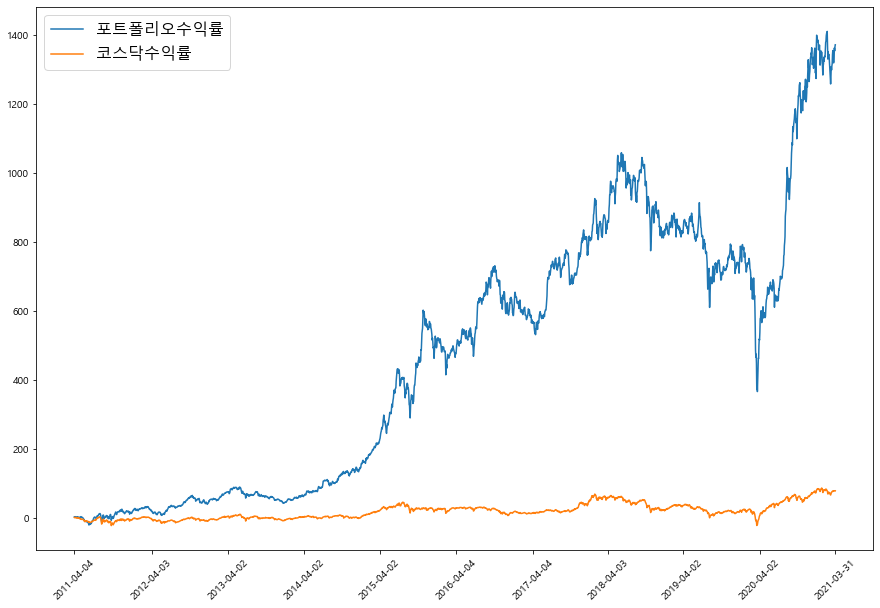

In [54]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,10))
plt.plot(stock_rtn_all["누적수익률(%)"],label='포트폴리오수익률')
plt.plot(stock_rtn_all["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,249,495,741,984,1231,1478,1719,1960,2208,2452], rotation=45)


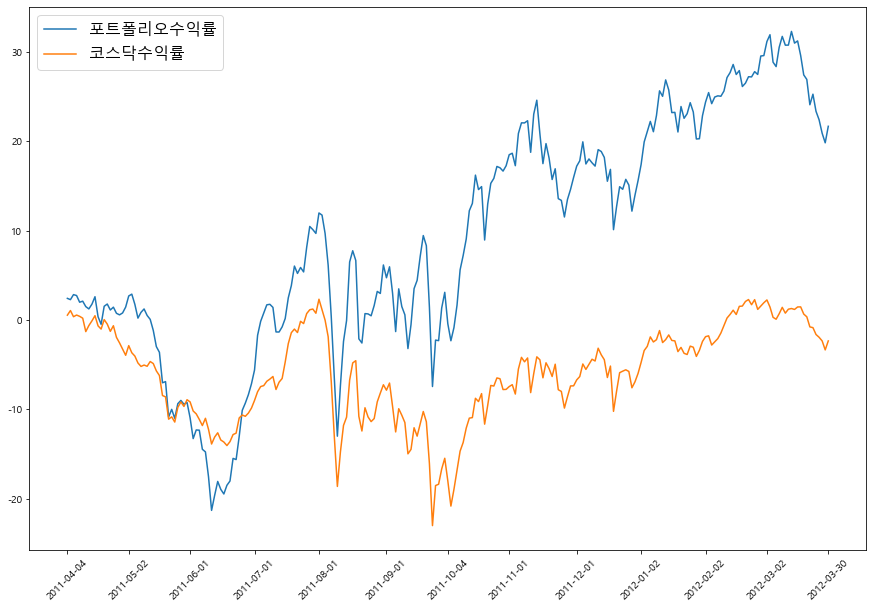

In [55]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2011["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2011["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()

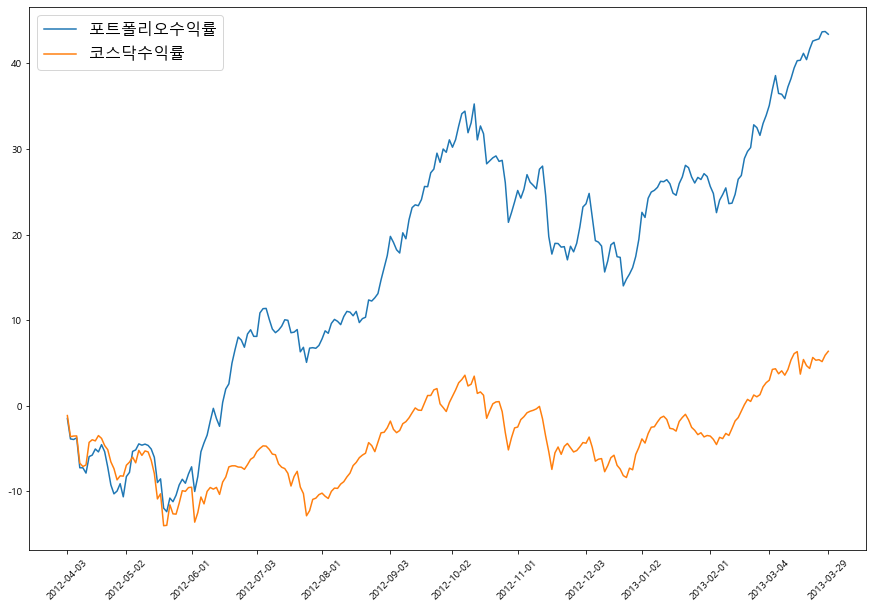

In [56]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2012["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2012["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,19,40,61,82,104,124,145,167,185,207,226,245], rotation=45)

plt.show()

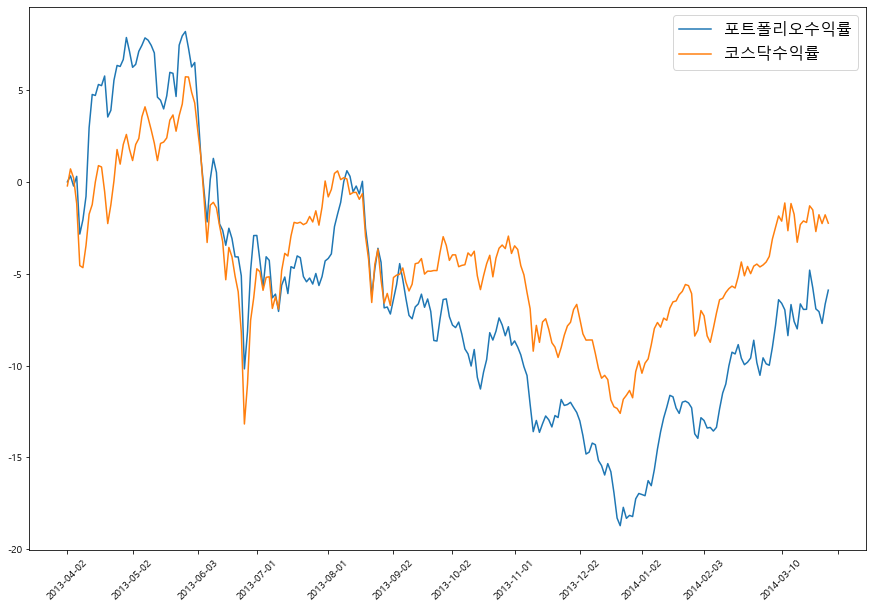

In [57]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2013["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2013["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,21,42,61,84,105,124,144,165,185,205,230,248], rotation=45)

plt.show()

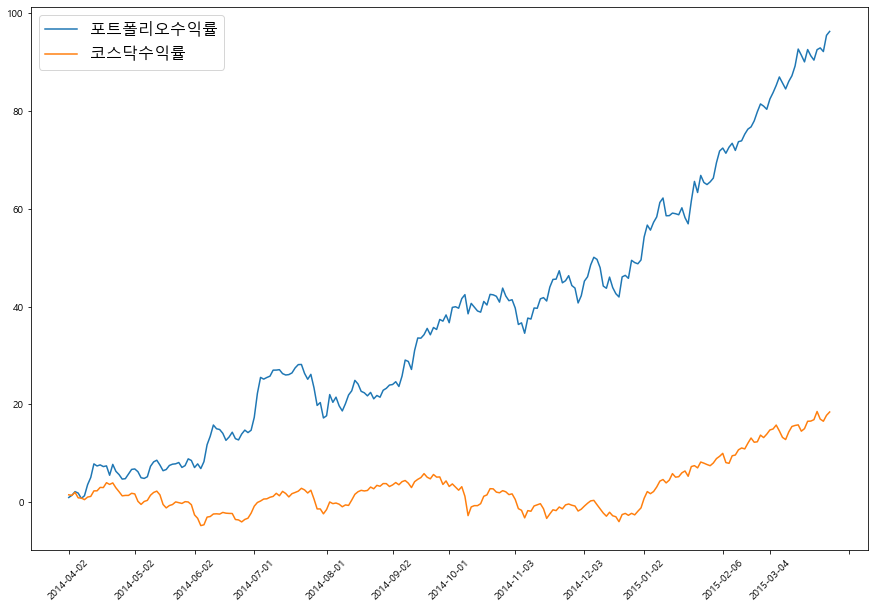

In [58]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2014["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2014["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,21,40,59,82,103,121,142,164,183,208,223,248], rotation=45)

plt.show()

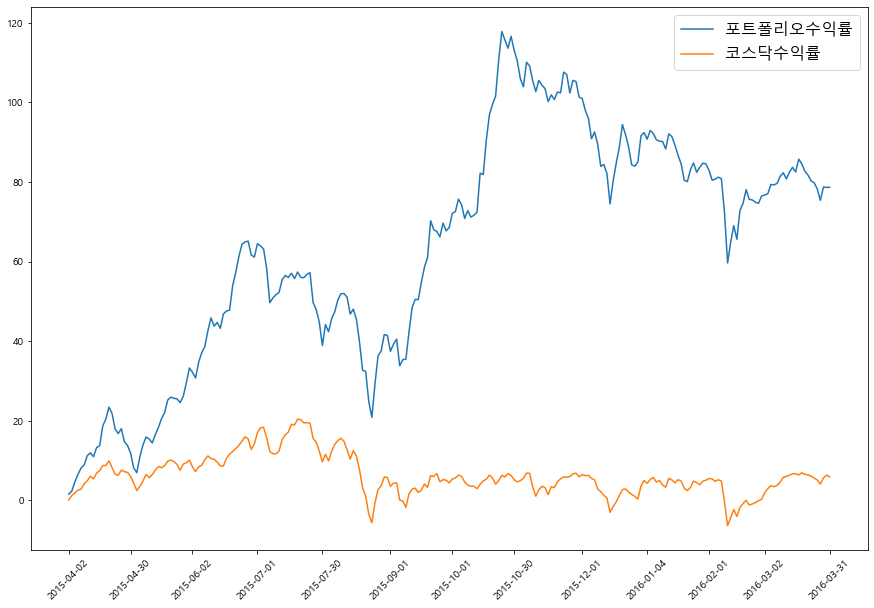

In [59]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2015["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2015["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,207,225,246], rotation=45)

plt.show()

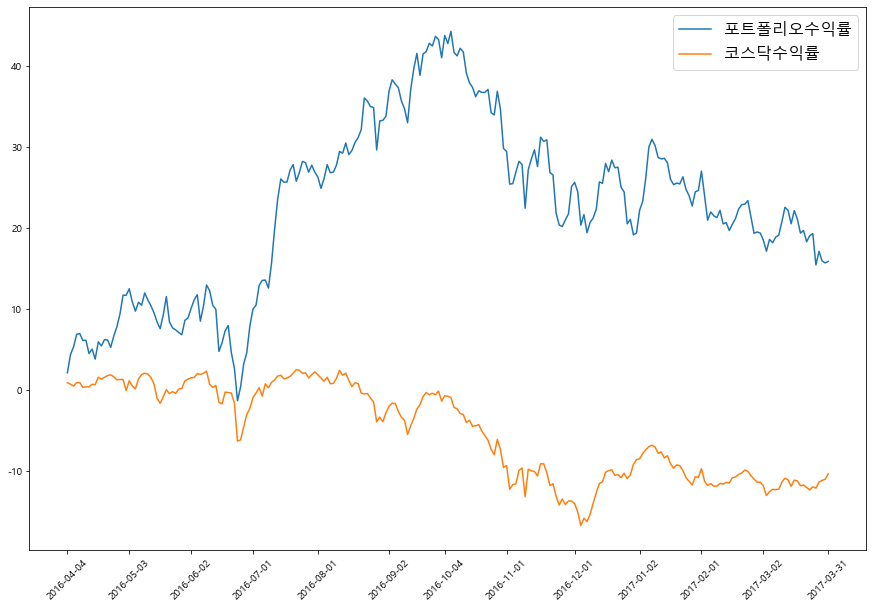

In [60]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2016["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2016["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,60,81,104,122,142,164,185,205,225,246], rotation=45)

plt.show()

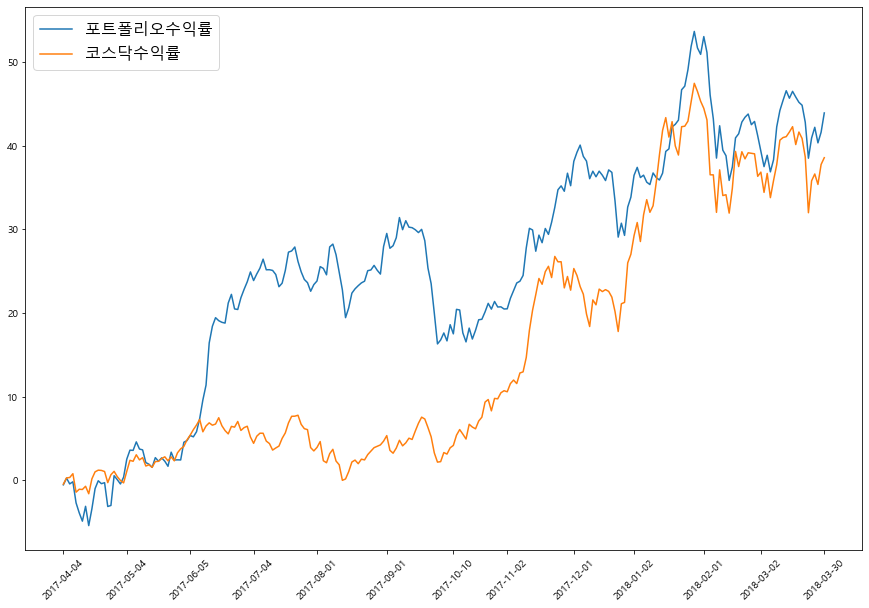

In [61]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2017["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2017["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,60,80,102,123,140,161,180,202,220,240], rotation=45)

plt.show()

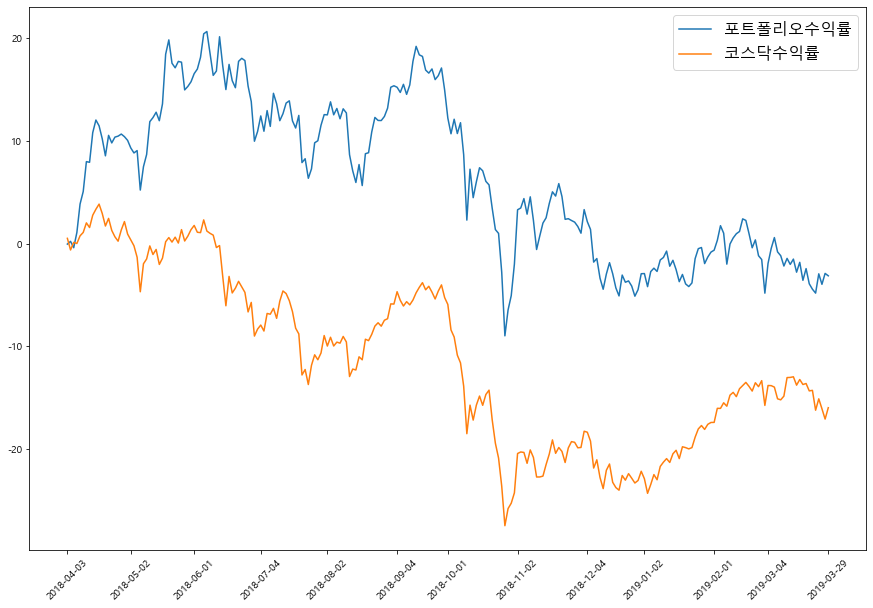

In [62]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2018["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2018["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,120,142,164,182,204,221,240], rotation=45)

plt.show()

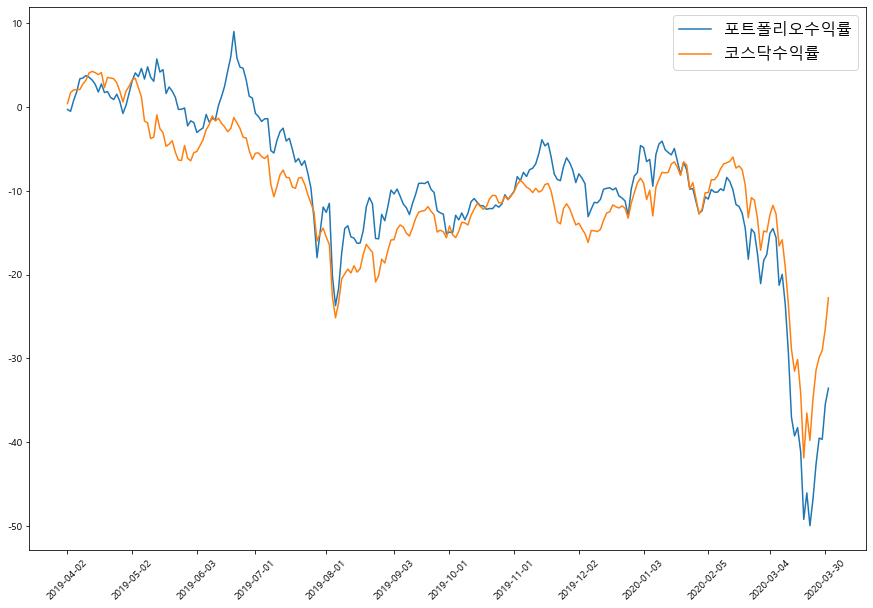

In [63]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2019["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2019["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,21,42,61,84,106,124,145,166,187,208,228,246], rotation=45)

plt.show()

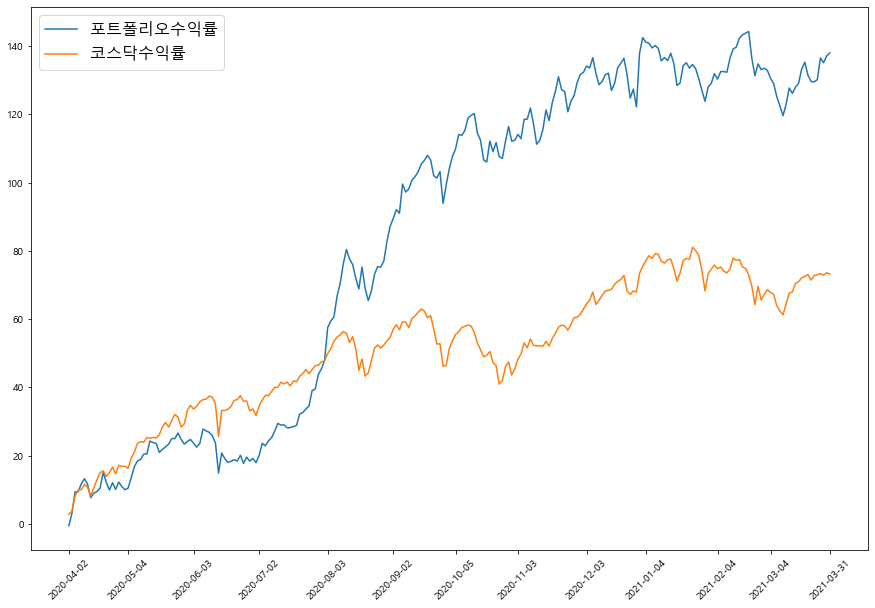

In [64]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2020["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2020["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,19,40,61,83,104,124,144,166,185,208,225,244], rotation=45)

plt.show()